# Project 3

## Problem Statement:

I have been hired by a new company that is trying to develop a tool to predict customers gender based on comments/reviews in order to develop their marketing intelligence. I chose to study two gender based subreddits(AskMen/AskWomen) and to build a model to see if there is a recognizable pattern and the actual ability to predict the gender of an author online.

## Imports

In [98]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

## Data Collection

In order to build a model; I first need to gather some data. I will scrape some post from two subreddits: AskMen and AskWomen that are clearly gender based. I Use the pushshift API to gather the data.

My plan is to get 2000 post from each subreddit but since the pushshift API limit you to a 100 posts per request, I'll write a function to get more data with a timer built-in to avoid overloading the requests.

A request will give me the maximum 100 posts and in order to get the 100 posts before I'll need the utc time of the least recent post which I figured was the post[99]:

I can now write a proper function:

In [2]:
def get_posts(sub_name, n):
    posts_list = []
    for i in range(0, n):
        
        if i == 0:
            url = 'https://api.pushshift.io/reddit/search/submission'
            params = {'subreddit': sub_name, 'size': 100}
            res = requests.get(url, params)
            data = res.json()
            posts = data['data']
            posts_list.append(posts)
        else:
            timecode = posts[99]['created_utc']
            url = 'https://api.pushshift.io/reddit/search/submission'
            params = {'subreddit': sub_name, 'size': 100, 'before': timecode}
            res = requests.get(url, params)
            data = res.json()
            posts = data['data']
            posts_list.append(posts)
            time.sleep(5)
    return posts_list
            

In [3]:
Ask_men_posts = get_posts('AskMen', 20)

In [4]:
len(Ask_men_posts)

20

With that function, the result is a list of 20 lists of a 100 posts each. I can now make 20 dataframes of 100 posts and merge them together

In [5]:
df_1 = pd.DataFrame(Ask_men_posts[0])
df_2 = pd.DataFrame(Ask_men_posts[1])
df_3 = pd.DataFrame(Ask_men_posts[2])
df_4 = pd.DataFrame(Ask_men_posts[3])
df_5 = pd.DataFrame(Ask_men_posts[4])
df_6 = pd.DataFrame(Ask_men_posts[5])
df_7 = pd.DataFrame(Ask_men_posts[6])
df_8 = pd.DataFrame(Ask_men_posts[7])
df_9 = pd.DataFrame(Ask_men_posts[8])
df_10 = pd.DataFrame(Ask_men_posts[9])
df_11 = pd.DataFrame(Ask_men_posts[10])
df_12 = pd.DataFrame(Ask_men_posts[11])
df_13 = pd.DataFrame(Ask_men_posts[12])
df_14 = pd.DataFrame(Ask_men_posts[13])
df_15 = pd.DataFrame(Ask_men_posts[14])
df_16 = pd.DataFrame(Ask_men_posts[15])
df_17 = pd.DataFrame(Ask_men_posts[16])
df_18 = pd.DataFrame(Ask_men_posts[17])
df_19 = pd.DataFrame(Ask_men_posts[18])
df_20 = pd.DataFrame(Ask_men_posts[19])

In [6]:
men_dataframes = [df_1,df_2,df_3,df_4,df_5,df_6,df_7,
                 df_8,df_9,df_10,df_11,df_12,df_13,df_14,
                  df_15,df_16,df_17,df_18,df_19,df_20]

In [7]:
ask_men_df = pd.concat(men_dataframes)

In [8]:
ask_men_df.shape

(2000, 66)

Let's save this dataframe to a csv file before I proceed to the AskWomen subreddit

In [9]:
ask_men_df.to_csv('data/askmen_df')

Now let's gather 2000 posts from the AskWomen subreddit using the function created above

In [11]:
Ask_women_posts = get_posts('AskWomen', 20)

In [12]:
len(Ask_women_posts)

20

Now I can convert the 20 lists into 20 dataframes and merge them together

In [13]:
df_21 = pd.DataFrame(Ask_women_posts[0])
df_22 = pd.DataFrame(Ask_women_posts[1])
df_23 = pd.DataFrame(Ask_women_posts[2])
df_24 = pd.DataFrame(Ask_women_posts[3])
df_25 = pd.DataFrame(Ask_women_posts[4])
df_26 = pd.DataFrame(Ask_women_posts[5])
df_27 = pd.DataFrame(Ask_women_posts[6])
df_28 = pd.DataFrame(Ask_women_posts[7])
df_29 = pd.DataFrame(Ask_women_posts[8])
df_30 = pd.DataFrame(Ask_women_posts[9])
df_31 = pd.DataFrame(Ask_women_posts[10])
df_32 = pd.DataFrame(Ask_women_posts[11])
df_33 = pd.DataFrame(Ask_women_posts[12])
df_34 = pd.DataFrame(Ask_women_posts[13])
df_35 = pd.DataFrame(Ask_women_posts[14])
df_36 = pd.DataFrame(Ask_women_posts[15])
df_37 = pd.DataFrame(Ask_women_posts[16])
df_38 = pd.DataFrame(Ask_women_posts[17])
df_39 = pd.DataFrame(Ask_women_posts[18])
df_40 = pd.DataFrame(Ask_women_posts[19])

In [14]:
women_dataframes = [df_21, df_22, df_23, df_24, df_25, df_26,
                   df_27, df_28, df_29, df_30, df_31, df_32,
                   df_33, df_34, df_35, df_36, df_37, df_38,
                   df_39, df_40]

In [15]:
ask_women_df = pd.concat(women_dataframes)

In [16]:
ask_women_df.shape

(2000, 70)

We can save this dataframe to a csv file now:

In [17]:
ask_women_df.to_csv('data/askwomen_df')

I have now two dataframes with 2000 posts each from the two subreddit: AskMen and AskWomen. Now, in order to build a model and determine if the author of a new post is a man or woman, I will need to merge these two dataframes together.
I noticed that the ask_men_df has 66 columns and the ask_women_df has 71 columns. To merge the two dataframes together I will need to delete the extra columns in the women dataframes first.
Let's analyze the columns in both dataframes to see which ones they have in common :

In [18]:
ask_men_df.columns

Index(['all_awardings', 'allow_live_comments', 'author',
       'author_flair_css_class', 'author_flair_richtext', 'author_flair_text',
       'author_flair_type', 'author_fullname', 'author_patreon_flair',
       'author_premium', 'awarders', 'can_mod_post', 'contest_mode',
       'created_utc', 'domain', 'full_link', 'gildings', 'id',
       'is_crosspostable', 'is_meta', 'is_original_content',
       'is_reddit_media_domain', 'is_robot_indexable', 'is_self', 'is_video',
       'link_flair_background_color', 'link_flair_richtext',
       'link_flair_text_color', 'link_flair_type', 'locked', 'media_only',
       'no_follow', 'num_comments', 'num_crossposts', 'over_18',
       'parent_whitelist_status', 'permalink', 'pinned', 'pwls',
       'retrieved_on', 'score', 'selftext', 'send_replies', 'spoiler',
       'stickied', 'subreddit', 'subreddit_id', 'subreddit_subscribers',
       'subreddit_type', 'thumbnail', 'title', 'total_awards_received',
       'treatment_tags', 'upvote_ratio',

In [19]:
ask_women_df.columns

Index(['all_awardings', 'allow_live_comments', 'author',
       'author_flair_css_class', 'author_flair_richtext', 'author_flair_text',
       'author_flair_type', 'author_fullname', 'author_patreon_flair',
       'author_premium', 'awarders', 'can_mod_post', 'contest_mode',
       'created_utc', 'domain', 'full_link', 'gildings', 'id',
       'is_crosspostable', 'is_meta', 'is_original_content',
       'is_reddit_media_domain', 'is_robot_indexable', 'is_self', 'is_video',
       'link_flair_background_color', 'link_flair_richtext',
       'link_flair_text_color', 'link_flair_type', 'locked', 'media_only',
       'no_follow', 'num_comments', 'num_crossposts', 'over_18',
       'parent_whitelist_status', 'permalink', 'pinned', 'pwls',
       'removed_by_category', 'retrieved_on', 'score', 'selftext',
       'send_replies', 'spoiler', 'stickied', 'subreddit', 'subreddit_id',
       'subreddit_subscribers', 'subreddit_type', 'suggested_sort',
       'thumbnail', 'title', 'total_awards_rec

I looked for a solution on stack overflow to find the non-common elements in two list:
https://stackoverflow.com/questions/11348347/find-non-common-elements-in-lists

In [20]:
set(ask_women_df.columns) ^ set(ask_men_df.columns)

{'link_flair_css_class',
 'link_flair_template_id',
 'link_flair_text',
 'suggested_sort'}

I can now drop these five columns from the askwomen dataframe:

In [21]:
ask_women_df.shape

(2000, 70)

In [22]:
ask_women_df.drop(['link_flair_css_class', 'link_flair_template_id',
                  'link_flair_text','suggested_sort'], axis=1, inplace= True)

Now I can merge the askmen and askwomen together:

In [23]:
subreddits_dataframe = pd.concat([ask_men_df, ask_women_df])

In [24]:
subreddits_dataframe.shape

(4000, 66)

Now that I have the final dataframe, let's save it to a csv file before I start the cleaning process:

In [25]:
subreddits_dataframe.to_csv('data/subreddits_df')

## Data Cleaning

The subreddits_dataframe has 66 columns presently but I only need a few for my analysis. In fact, I only need the author, title, post and the subreddit. Let's drop all the unnecessary columns:

In [26]:
subreddits_dataframe.columns

Index(['all_awardings', 'allow_live_comments', 'author',
       'author_flair_css_class', 'author_flair_richtext', 'author_flair_text',
       'author_flair_type', 'author_fullname', 'author_patreon_flair',
       'author_premium', 'awarders', 'can_mod_post', 'contest_mode',
       'created_utc', 'domain', 'full_link', 'gildings', 'id',
       'is_crosspostable', 'is_meta', 'is_original_content',
       'is_reddit_media_domain', 'is_robot_indexable', 'is_self', 'is_video',
       'link_flair_background_color', 'link_flair_richtext',
       'link_flair_text_color', 'link_flair_type', 'locked', 'media_only',
       'no_follow', 'num_comments', 'num_crossposts', 'over_18',
       'parent_whitelist_status', 'permalink', 'pinned', 'pwls',
       'retrieved_on', 'score', 'selftext', 'send_replies', 'spoiler',
       'stickied', 'subreddit', 'subreddit_id', 'subreddit_subscribers',
       'subreddit_type', 'thumbnail', 'title', 'total_awards_received',
       'treatment_tags', 'upvote_ratio',

In [27]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

I realized that all the posts are under the 'selftext' column.

In [28]:
columns_dropped = ['all_awardings', 'allow_live_comments', 'author_flair_css_class',
                  'author_flair_richtext','author_flair_text', 'author_flair_type', 'author_fullname',
                  'author_patreon_flair','author_premium', 'awarders', 'can_mod_post', 'contest_mode',
                  'created_utc', 'domain', 'full_link', 'gildings', 'id','is_crosspostable', 'is_meta',
                  'is_original_content', 'is_reddit_media_domain', 'is_robot_indexable', 'is_self',
                  'is_video', 'link_flair_background_color', 'link_flair_richtext','link_flair_text_color',
                  'link_flair_type', 'locked', 'media_only','no_follow', 'num_comments', 'num_crossposts',
                  'over_18', 'parent_whitelist_status', 'permalink', 'pinned', 'pwls','retrieved_on','score',
                  'send_replies', 'spoiler','stickied','subreddit_id', 'subreddit_subscribers','subreddit_type',
                  'thumbnail','total_awards_received','treatment_tags','upvote_ratio', 'url', 'whitelist_status', 
                  'wls','removed_by_category', 'post_hint', 'preview','author_flair_background_color', 
                  'author_flair_text_color', 'banned_by','author_flair_template_id', 'author_cakeday', 'edited']

In [29]:
subreddits_dataframe.drop(columns_dropped, axis= 1, inplace=True)

In [30]:
subreddits_dataframe.head(5)

,author,selftext,subreddit,title
0,Luk42_H4hn,,AskMen,"Men of reddit, when you jerk into a towel or s..."
1,YoPierre_,[removed],AskMen,How do i get over my ex
2,Luk42_H4hn,,AskMen,"Men of reddit, when your gf is giving you a ha..."
3,RebeliciousCupcake,[removed],AskMen,Looking at other men
4,Penguins-can-fly,[removed],AskMen,Why am i unable to feel satisfaction during se...


Before I take care of other issues, I choose to rearrange the columns:

In [31]:
subreddits_dataframe = subreddits_dataframe[['author','title','selftext','subreddit']]

I can already spot one issue with the selftext columns. A lot of post have a '[removed]' value. Let's check if the dataframe contains any null values or duplicate first:

In [32]:
subreddits_dataframe.isnull().sum()

author         0
title          0
selftext     114
subreddit      0
dtype: int64

As anticipated, the selftext column has a lot of null values and a lot of '[removed]'. If I sum those two situations and decide to drop all these row, I can potentially lose a major part of my dataframe. The selftext and the title go together. Sometimes the title already contains all the information and other times it is just a title and the selftext is actually the content of the post. The logical thing to do would be to replace all the '[removed]' values with a blank text and then combine the title and selftext column:

In [33]:
subreddits_dataframe['selftext'] = subreddits_dataframe['selftext'].replace(['[removed]'],'')

Now I can create a column called 'post' which would be a combination of the title column and the selftext column:

In [34]:
subreddits_dataframe['post'] = subreddits_dataframe['title'] + ' ' + subreddits_dataframe['selftext']

Now I'm going to drop the title and selftext column and rearrange the order of the columns once again

In [35]:
subreddits_dataframe.drop(['title', 'selftext'], axis= 1, inplace=True)

In [36]:
subreddits_dataframe = subreddits_dataframe[['author','post','subreddit']]

Let's see if the dataframe still has some null values:

In [37]:
subreddits_dataframe.isnull().sum()

author         0
post         114
subreddit      0
dtype: int64

I think I can drop those nulls with confidence because I took care of the removed values and 114 is only 2.85% of the total rows

In [38]:
subreddits_dataframe.dropna(inplace=True)

I can now look closer to the post column and check if there are many duplicates; I used this source for reference:
https://thispointer.com/pandas-find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns-using-dataframe-duplicated-in-python/

In [39]:
subreddits_dataframe[subreddits_dataframe.duplicated(['post'])]

,author,post,subreddit
20,Great_Classic_2804,I've lost myself in my relationship. Feel like...,AskMen
58,sufy12,Have you ever been caught masturbating?,AskMen
42,h3xadecimal2,AIs from AI Dungeon 2 to sexy to funny and one...,AskMen
44,h3xadecimal2,AIs from AI Dungeon 2 to sexy to funny and one...,AskMen
47,gay_gym_jock,"In your experience, if you've gotten head from...",AskMen
13,vandamnitt,Guys I’ve been debating this with m wife for e...,AskMen
14,vandamnitt,Guys I’ve been debating this with m wife for e...,AskMen
53,fmu_rn,Why do guys like thighs?,AskMen
5,heartofrosegold0112,Is your right to use porn in a relationship a ...,AskMen
12,aliceinxxxxxxland,Would you give up porn for your perfect partner?,AskMen


In [40]:
subreddits_dataframe.duplicated().sum()

52

The subreddit has 52 duplicated rows; I decide to drop them using this reference:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html

In [41]:
subreddits_dataframe.drop_duplicates(subset=['post'], inplace=True)

I am trying to build a model to predict if a post belong to the AskMen subreddit or the AskWomen subreddit. The subreddit is my target and subsequently I will need to build a confusion matrix and that for that reason, I will change the subreddit values to 0 and 1.

In [42]:
subreddits_dataframe['subreddit'] = subreddits_dataframe['subreddit'].map({'AskWomen': 1, 'AskMen': 0})

I don't think the author column will be relevant to my analysis so I decide to drop it.

In [43]:
subreddits_dataframe.drop('author', axis= 1, inplace=True)

One last step ! When I went I started the EDA, I realized that I had some arabic characters in post and also numbers that are not words. I looked on stackoverflow and found a line of code to remove those characters:
https://stackoverflow.com/questions/36340627/remove-non-ascii-characters-from-pandas-column

https://stackoverflow.com/questions/41719259/how-to-remove-numbers-from-string-terms-in-a-pandas-dataframe

In [56]:
subreddits_dataframe.post.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)

In [70]:
subreddits_dataframe['post'] = subreddits_dataframe['post'].str.replace('\d+', '')

In [83]:
subreddits_dataframe['post'] = subreddits_dataframe['post'].str.replace('___', '')

## EDA

let's now explore the words distribution in the AskMen and AskWomen subreddits. In order to do this I will create a common called 'word_count' that will be the number of word in each post:

In [84]:
subreddits_dataframe['word_count'] = subreddits_dataframe['post'].apply(lambda x: len(x.split()))

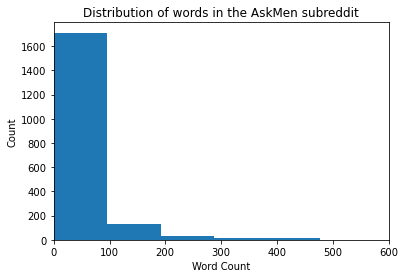

In [85]:
plt.hist(subreddits_dataframe[subreddits_dataframe['subreddit'] == 0]['word_count'])
plt.xlim(0, 600)
plt.title('Distribution of words in the AskMen subreddit')
plt.xlabel('Word Count')
plt.ylabel('Count');

Most posts from the Askmen subreddit are between 1 and 100 words and we can observe a big drop in the number of post over 100 words. There are less than 50 posts above 300 words. Let's check the statistics: 

In [86]:
subreddits_dataframe[subreddits_dataframe['subreddit'] == 0]['word_count'].describe()

count    1905.000000
mean       37.677165
std        67.786702
min         1.000000
25%         9.000000
50%        14.000000
75%        31.000000
max       953.000000
Name: word_count, dtype: float64

We can see that 75% of the AskMen posts are between 1 and 31 words. The average word count is 38 words and the longest post has 960 words. It is not shown on the plot because I chose what I thought was an appropriate view of the distribution in regards to the X-axis. In this case any posts above 500 words would be outliers.

Let's observe the AskWomen distribution of word counts:

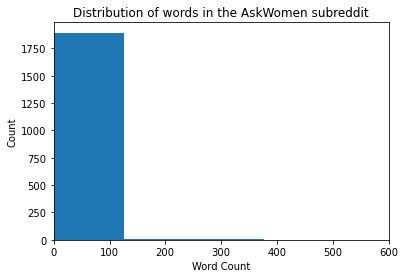

In [87]:
plt.hist(subreddits_dataframe[subreddits_dataframe['subreddit'] == 1]['word_count'])
plt.xlim(0, 600)
plt.title('Distribution of words in the AskWomen subreddit')
plt.xlabel('Word Count')
plt.ylabel('Count');

Again, most posts are between 1 and a little above 100 words. The women have less post above 100 than the men. Let's verify this with some statistics:

In [88]:
subreddits_dataframe[subreddits_dataframe['subreddit'] == 1]['word_count'].describe()

count    1910.000000
mean       18.201571
std        35.494541
min         0.000000
25%         9.000000
50%        13.000000
75%        20.000000
max      1255.000000
Name: word_count, dtype: float64

The average post from the AskWomen subreddit has 36 words, a little bit less than the men. 75% of the posts are between 1 and 20 words and the longest post has 1257 words, definitely an outlier. I have to note that there are 5 post more from the AskWomen subreddit compared to the Askmen subreddit in the dataframe.

I looked at the word count distribution but that is just one aspect of my analysis. It is also interesting to see which words are more common than other depending on the subreddit. Which one are used a lot by both gender ?
In order to perform an EDA on the words, I will need to count vectorize the posts and save it to a new dataframe:

In [89]:
cvec = CountVectorizer(stop_words='english')

Let's do it for the AskWomen subreddit first and then the AskMen; we'll save the results into two separate dataframe

In [90]:
cvec.fit(subreddits_dataframe[subreddits_dataframe['subreddit'] == 1]['post'])

CountVectorizer(stop_words='english')

In [91]:
vectorized_ask_women = word_df = pd.DataFrame(cvec.transform(subreddits_dataframe[subreddits_dataframe['subreddit']\
                                                                                == 1]['post']).todense(),
                                            columns = cvec.get_feature_names())
                      

In [92]:
cvec = CountVectorizer(stop_words='english')

In [93]:
cvec.fit(subreddits_dataframe[subreddits_dataframe['subreddit'] == 0]['post'])

CountVectorizer(stop_words='english')

In [94]:
vectorized_ask_men = word_df = pd.DataFrame(cvec.transform(subreddits_dataframe[subreddits_dataframe['subreddit']\
                                                                                == 0]['post']).todense(),
                                            columns = cvec.get_feature_names())

We can now observe the 20 most common word in each subreddit:

In [96]:
vectorized_ask_women.sum().sort_values(ascending=False).head(20)

women           388
did             221
like            202
feel            153
men             117
know            109
relationship    108
does            105
man              92
just             91
ladies           88
sex              84
partner          83
think            82
reddit           80
guy              79
friends          79
love             78
want             74
share            74
dtype: int64

These are the 20 most common words in the posts from the AskWomen subreddit. Women is the word used the most with words like feel, like, men, relationship. Without being cliché, this is definitely representative. One exception here is "did" which should be a stop word. Let's represent it with a bar chart:

In [107]:
common_word_women = vectorized_ask_women.sum().sort_values(ascending=False).head(20)

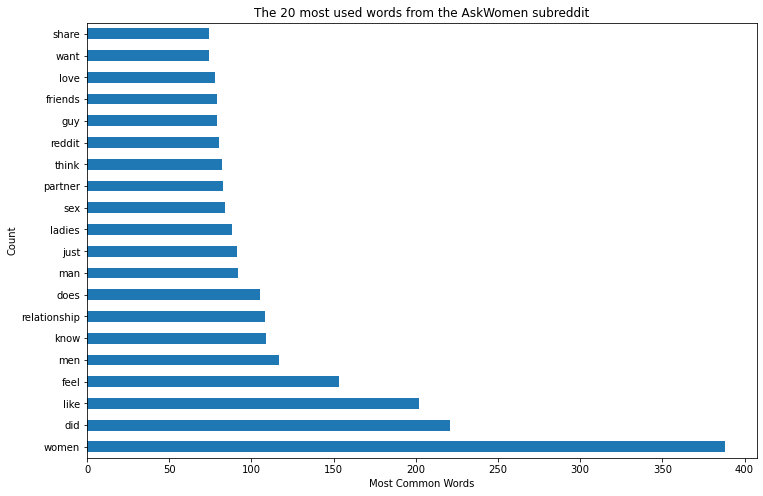

In [117]:
plt.figure(figsize=(12, 8))
common_word_women.plot(kind='barh')
plt.title('The 20 most used words from the AskWomen subreddit')
plt.xlabel('Most Common Words')
plt.ylabel('Count');

Let's now observe the 20 most common words from the AskMen subreddit:

In [111]:
vectorized_ask_men.sum().sort_values(ascending=False).head(20)

men        460
like       415
just       410
feel       249
know       247
guys       214
want       211
time       209
im         205
really     195
women      184
think      183
don        178
did        174
girl       157
life       148
people     146
friends    144
reddit     142
ve         141
dtype: int64

The most common word is men. This is one similarity between both subreddit; men talk about men and women talk about women; pretty obvious! Other than that, the word like, just, feel and know are pretty recurrent. Let's visualize this with a chart as welll:

In [112]:
common_word_men = vectorized_ask_men.sum().sort_values(ascending=False).head(20)

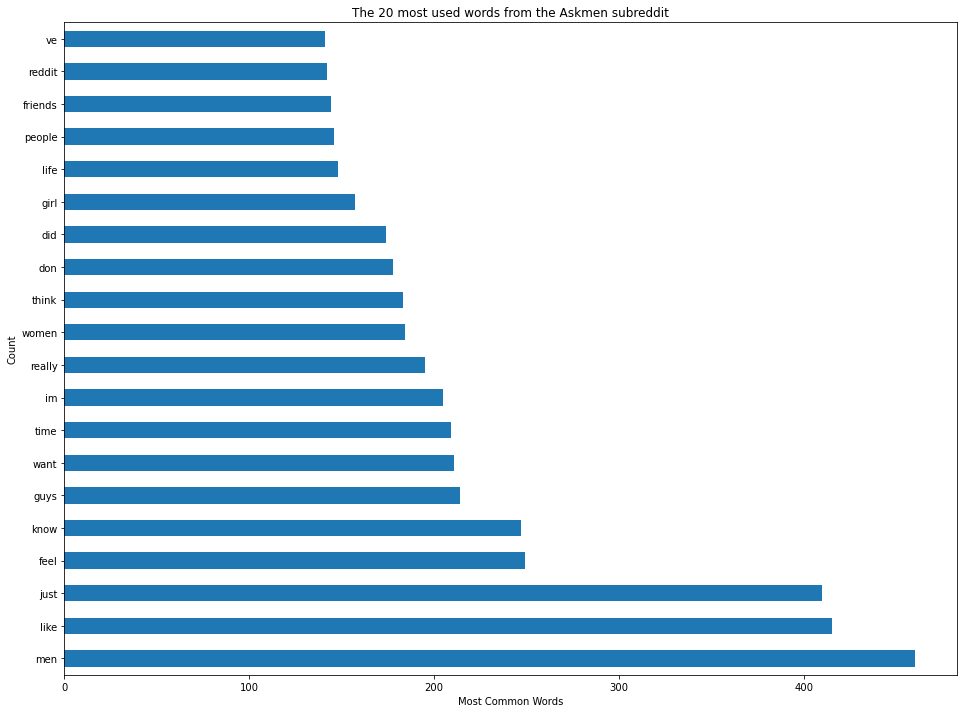

In [118]:
plt.figure(figsize=(16, 12))
common_word_men.plot(kind='barh')
plt.title('The 20 most used words from the Askmen subreddit')
plt.xlabel('Most Common Words')
plt.ylabel('Count');

Even though the distribution of word counts and the observation of the most common words gives pretty similar results, we still can observe some differences and I'm confident that I'll be able to fit a model to predict where a post would be classified to. But first I must take some appropriate steps.

In [114]:
subreddits_dataframe.to_csv('data/subreddits_df')

I save the dataframe to a csv file with all the current changes